## Ejercicios de API's

## Enunciado - Obtener datos energéticos usando la API de Red Eléctrica.

Descripción: La empresa para la que trabajamos dispone de una base de datos que contiene información sobre el número de personas censadas en las distintas Comunidades Autónomas españolas desde 1998 hasta 2022. El objetivo es enriquecer estos datos con información sobre la generación de energía renovable y no renovable, utilizando la API de REData, la cual proporciona información sobre el mercado energético en España. Puedes encontrar la documentación de la API aquí. https://www.ree.es/es/apidatos

1. Extracción de Datos a Nivel Nacional:

Extraer datos de generación de energía renovable y no renovable a nivel nacional desde el 1 de enero de 2011 hasta el 31 de diciembre de 2022. La información debe ser recopilada a nivel mensual.

Transformar los datos para incluir una columna nueva que identifique si la energía es renovable o no renovable.

Almacenar los datos en un DataFrame con la siguiente estructura:

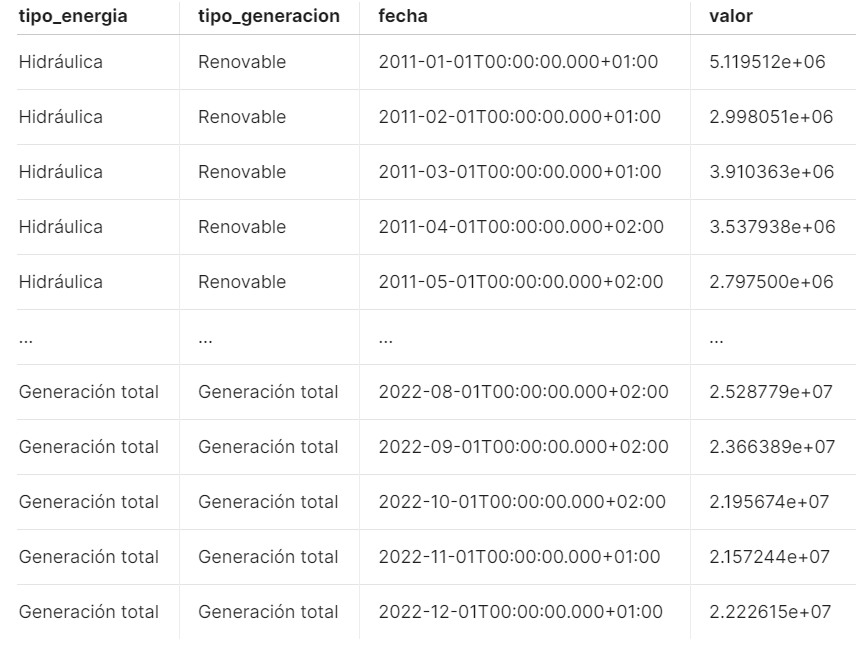

In [72]:
import pandas as pd
import requests

In [117]:

url_electrica=f"https://apidatos.ree.es/es/datos/generacion/evolucion-renovable-no-renovable?start_date=2021-01-01T00:00&end_date=2022-12-31T23:59&time_trunc=month&geo_trunc=electric_system&geo_limit=peninsular&geo_ids=8742"


In [118]:
def llamar_api (endpoint):
    llamada =requests.get(endpoint)
    
    print (f"La llamada a la API nos ha dado una respuesta de tipo {llamada.status_code}")
    
    if llamada.status_code != 200:
        print (f"El motivo por el que la llamada falló es {llamada.reason}")
    else:
        return llamada.json()

In [119]:
datos_energia = llamar_api(url_electrica)
datos_energia

La llamada a la API nos ha dado una respuesta de tipo 200


{'data': {'type': 'Evolución de la generación renovable/no renovable',
  'id': 'gen2',
  'attributes': {'title': 'Evolución de la generación renovable/no renovable',
   'last-update': '2022-01-11T09:21:30.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'MISS'}}},
 'included': [{'type': 'Renovable',
   'id': '10299',
   'groupId': None,
   'attributes': {'title': 'Renovable',
    'description': 'Energía renovable: incluye hidráulica, hidroeólica, eólica, solar fotovoltaica, solar térmica, otras renovables y residuos renovables.',
    'color': '#92d050',
    'type': 'Renovable',
    'magnitude': None,
    'composite': False,
    'last-update': '2022-01-11T09:21:30.000+01:00',
    'values': [{'value': 99992.495,
      'percentage': 0.1542752215225199,
      'datetime': '2021-01-01T00:00:00.000+01:00'},
     {'value': 78996.373,
      'percentage': 0.13704342852713253,
      'datetime': '2021-02-01T00:00:00.000+01:00'},
     {'value': 112383.036,
      'percentag

2. Extracción de Datos por Comunidad Autónoma:

Extraer datos de generación de energía renovable y no renovable por Comunidad Autónoma.

Utilizar el diccionario cod_comunidades para obtener los códigos de cada comunidad autónoma.

Transformar los datos para incluir una columna que especifique la comunidad autónoma y su identificador.

Almacenar los datos en un DataFrame con la siguiente estructura:

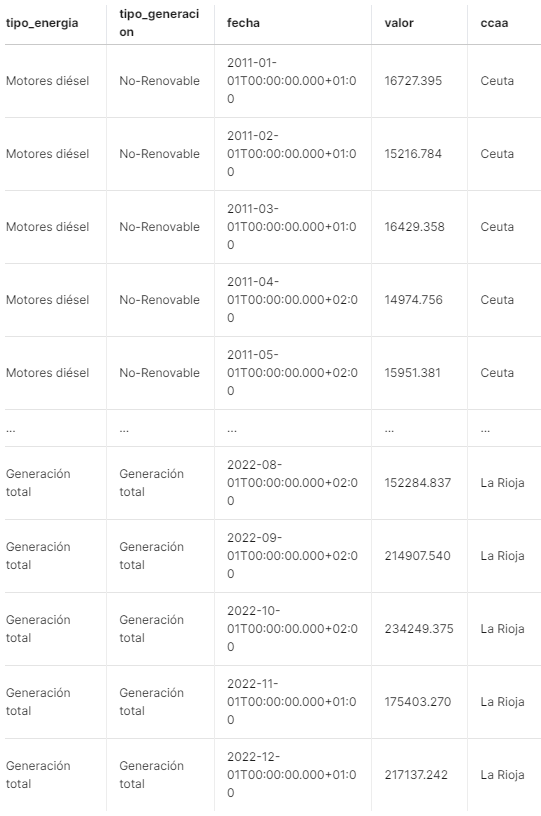

El diccionario de cod_comunidades es:

cod_comunidades = {'Ceuta': 8744,
                    'Melilla': 8745,
                    'Andalucía': 4,
                    'Aragón': 5,
                    'Cantabria': 6,
                    'Castilla - La Mancha': 7,
                    'Castilla y León': 8,
                    'Cataluña': 9,
                    'País Vasco': 10,
                    'Principado de Asturias': 11,
                    'Comunidad de Madrid': 13,
                    'Comunidad Foral de Navarra': 14,
                    'Comunitat Valenciana': 15,
                    'Extremadura': 16,
                    'Galicia': 17,
                    'Illes Balears': 8743,
                    'Canarias': 8742,
                    'Región de Murcia': 21,
                    'La Rioja': 20}
